In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_features = train.drop(['SalePrice','Id'],axis=1)
test = test.drop(['Id'],axis=1)

In [6]:
train_features.shape

(1460, 79)

In [7]:
test.shape

(1459, 79)

# Deal with missing values

In [8]:
def DropMissingValue(data:pd,threshold = 0.3) -> pd: # drop missing value that exceed threshold of number of observations
    df_null = data.isnull().sum()
    null_index = df_null[df_null >= threshold*data.shape[0]].index
    data = data.drop(null_index,axis=1)
    return data

In [9]:
train_new = DropMissingValue(train_features)
test_new = DropMissingValue(test)

In [10]:
train_new.columns == test_new.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Fill nan with mean for float numbers except for year,fill nan with mode for categorical values

In [11]:
train_null = train_new.isnull().sum().sort_values(ascending=False) != 0
train_null_idx = train_null[train_null].index

In [12]:
test_null = test_new.isnull().sum().sort_values(ascending=False) != 0
test_null_idx = test_null[test_null].index

In [13]:
train_new[train_null_idx].dtypes

LotFrontage     float64
GarageFinish     object
GarageType       object
GarageCond       object
GarageQual       object
GarageYrBlt     float64
BsmtExposure     object
BsmtFinType2     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

In [14]:
train_null_idx

Index(['LotFrontage', 'GarageFinish', 'GarageType', 'GarageCond', 'GarageQual',
       'GarageYrBlt', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
       'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [15]:
train_new[['LotFrontage','MasVnrArea']] = train_new[['LotFrontage','MasVnrArea']].fillna(train_new.mean().iloc[0])

In [16]:
train_new[[ 'GarageCond', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
           'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType','Electrical']] = train_new[[ 'GarageCond', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
           'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType','Electrical']].fillna(train_new.mode().iloc[0])

In [17]:
test_null_idx

Index(['LotFrontage', 'GarageFinish', 'GarageCond', 'GarageQual',
       'GarageYrBlt', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MasVnrArea', 'MSZoning',
       'Functional', 'BsmtHalfBath', 'BsmtFullBath', 'Utilities',
       'Exterior2nd', 'Exterior1st', 'KitchenQual', 'TotalBsmtSF',
       'GarageCars', 'SaleType', 'BsmtUnfSF', 'GarageArea', 'BsmtFinSF2',
       'BsmtFinSF1'],
      dtype='object')

In [18]:
test_new[['LotFrontage','MasVnrArea','BsmtHalfBath','BsmtFullBath','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF',
          'GarageArea']] = test_new[['LotFrontage','MasVnrArea','BsmtHalfBath','BsmtFullBath','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF',
          'GarageArea']].fillna(train_new.mean().iloc[0])

In [19]:
test_new[[ 'GarageCond', 'GarageQual', 'GarageYrBlt',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'BsmtUnfSF',
       'SaleType', 'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual']] = test_new[[ 'GarageCond', 'GarageQual', 'GarageYrBlt',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'BsmtUnfSF',
       'SaleType', 'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual']].fillna(train_new.mode().iloc[0])

# Categorical features

In [20]:
df = pd.concat([train_new,test_new])  #Combine train and test data

In [21]:
def Dummies(data:pd) -> pd:  # dummy all categorical features
    object_features = data.dtypes[df.dtypes == object].index
    dummies = pd.get_dummies(data[object_features])
    df_new = pd.concat([data,dummies],axis=1)
    df_new.drop(columns=object_features,inplace=True)
    df_new = df_new.loc[:,~df_new.columns.duplicated()]
    return df_new

In [22]:
df_new = Dummies(df)

In [23]:
df_new.shape

(2919, 270)

# Split the train and test back

In [24]:
train_new = df_new.iloc[:1460,:]
test_new = df_new.iloc[1460:,:]

# Do some feature engineering

In [25]:
train_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
np.corrcoef(train_new['OverallQual'],train_new['OverallCond'])  
# these two features looks correlated as names implies, but they are not correlated much

array([[ 1.        , -0.09193234],
       [-0.09193234,  1.        ]])

YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)<br>
MoSold: Month Sold (MM)<br>
YrSold: Year Sold (YYYY)


House's life and remodel  may be a critical feature to price the house

In [27]:
# do something with YearBuilt and YearRemodAdd and MoSold: Month Sold (MM) and YrSold: Year Sold (YYYY)
train_new['LifeBuilt'] = train_new['MoSold']/12 + train_new['YrSold'] - train_new['YearBuilt']
train_new['LifeRemod'] = train_new['MoSold']/12 + train_new['YrSold'] - train_new['YearRemodAdd']

In [28]:
test_new['LifeBuilt'] = test_new['MoSold']/12 + test_new['YrSold'] - test_new['YearBuilt']
test_new['LifeRemod'] = test_new['MoSold']/12 + test_new['YrSold'] - test_new['YearRemodAdd']

In [29]:
train_new = train_new.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'],axis=1)
test_new = test_new.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'],axis=1)

YearBuilt and YearRemodAdd : Result does not improve

Next: <br>
Try to do something with square feet : <br>

BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>

1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>

GarageArea: Size of garage in square feet<br>

WoodDeckSF: Wood deck area in square feet<br>

OpenPorchSF: Open porch area in square feet<br>

EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>

# Build model

In [74]:
X = train_new
y = train['SalePrice']

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [77]:
xgb_model = xgb.XGBRegressor()

In [78]:
xgb_model.fit(X_train,y_train)

[09:23:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# HyperParameter Optimization

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
n_estimator = [20,30,50,100,120,200,300,500,900,1000]
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]
max_depth = [2,3,5,10,15]
learning_rate = [0.05,0.1,0.15,0.2,0.25,0.3]
min_childweight = [1,2,3,4,5]

In [81]:
hyperparametergrid = {'n_estimator':n_estimator,
                      'max_depth':max_depth,
                     'learning_rate':learning_rate,
                     'min_child_weight':min_childweight,
                     'booster':booster,
                     'base_score':base_score}

In [82]:
random_cv = RandomizedSearchCV(estimator=xgb_model,
                              param_distributions=hyperparametergrid,
                              cv=5,scoring='neg_mean_squared_error',return_train_score=True,verbose=5,random_state=123)

In [83]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[09:23:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-133948725.635, test=-595281283.199), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[09:23:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-153272548.448, test=-1485458666.538), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[09:23:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-130417701.470, test=-1182855501.734), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[09:23:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-138693577.789, test=-709100125.951), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[09:23:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-137702883.456, test=-740258929.714), total=   0.7s
[CV] n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1 
[09:23:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1, score=(train=-1527042827.471, test=-828498479.683), total=   0.5s
[CV] n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1 
[09:23:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1, scor

[CV]  n_estimator=100, min_child_weight=2, max_depth=2, learning_rate=0.1, booster=gblinear, base_score=0.75, score=(train=-1449658064.572, test=-1792108290.401), total=   0.5s
[CV] n_estimator=100, min_child_weight=2, max_depth=2, learning_rate=0.1, booster=gblinear, base_score=0.75 
[09:23:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=100, min_child_weight=2, max_depth=2, learning_rate=0.1, booster=gblinear, base_score=0.75, score=(train=-1531949522.574, test=-1182086253.067), total=   0.5s
[CV] n_estimator=200, min_child_weight=4, max_depth=2, learning_rate=0.2, booster=gbtree, base_score=1 
[09:23:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=200, min_child_weight=4, max_depth=2, learning_rate=0.2, booster=gbtree, base_score=1, 

[CV]  n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25, score=(train=-334654866.208, test=-1315581889.262), total=   0.7s
[CV] n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25 
[09:23:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25, score=(train=-334814950.875, test=-820376746.439), total=   0.7s
[CV] n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25 
[09:23:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                      

In [84]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimator=50,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# Optimize model using hyperparameters

In [85]:
xgb_model_opt = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimator=50,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [86]:
xgb_model_opt.fit(X_train,y_train)

[09:24:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimator=50,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# Predict using Optimized model

In [87]:
preds = xgb_model_opt.predict(X_test)

In [88]:
RMSE = sqrt(mean_squared_error(y_test,preds))

In [89]:
print(RMSE)  # error is higher than yesterday after doing the features of YearBuilt,YearRemodAdd

22524.1644873968


# Predict Test dataset

In [144]:
sub = pd.read_csv('sample_submission.csv')

In [145]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [146]:
saleprice = xgb_model_opt.predict(test_new )

In [147]:
sub['SalePrice'] = saleprice

In [148]:
sub.to_csv('submission.csv',index=False)

In [149]:
sub.head()

,Id,SalePrice
0,1461,122592.929688
1,1462,154926.968750
2,1463,174332.906250
3,1464,193412.609375
4,1465,204540.671875


# Try Keras

In [131]:
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [133]:
X_train.shape

(1168, 268)

In [134]:
input_shape = X_train.shape[1]
input_shape

268

In [135]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(60,input_shape=(input_shape,),activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [136]:
#opt = SGD(lr=0.2, momentum=0.8)

In [137]:
model.compile(loss='mean_squared_error',optimizer='adamax')

In [138]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=800,verbose=1)

Train on 1168 samples, validate on 292 samples
Epoch 1/800
1168/1168 [==============================] - 0s 150us/sample - loss: 37791022879.5616 - val_loss: 41064831228.4931
Epoch 2/800
1168/1168 [==============================] - 0s 35us/sample - loss: 36965124264.3288 - val_loss: 40070011833.8630
Epoch 3/800
1168/1168 [==============================] - 0s 36us/sample - loss: 35671017163.3973 - val_loss: 38186210121.6438
Epoch 4/800
1168/1168 [==============================] - 0s 36us/sample - loss: 33269887929.8630 - val_loss: 34892631979.8356
Epoch 5/800
1168/1168 [==============================] - 0s 35us/sample - loss: 29392817053.8082 - val_loss: 29641587164.9315
Epoch 6/800
1168/1168 [==============================] - 0s 35us/sample - loss: 23835010763.3973 - val_loss: 22404860829.8082
Epoch 7/800
1168/1168 [==============================] - 0s 36us/sample - loss: 17566523700.6027 - val_loss: 14907713683.2877
Epoch 8/800
1168/1168 [==============================] - 0s 38us/sampl

1168/1168 [==============================] - 0s 39us/sample - loss: 2464415305.6438 - val_loss: 2614319202.1918
Epoch 67/800
1168/1168 [==============================] - 0s 35us/sample - loss: 2441450543.3425 - val_loss: 2605628037.2603
Epoch 68/800
1168/1168 [==============================] - 0s 34us/sample - loss: 2420289241.4247 - val_loss: 2587014758.5753
Epoch 69/800
1168/1168 [==============================] - 0s 35us/sample - loss: 2395266433.7534 - val_loss: 2562925778.4110
Epoch 70/800
1168/1168 [==============================] - 0s 34us/sample - loss: 2373937155.5068 - val_loss: 2567334263.2329
Epoch 71/800
1168/1168 [==============================] - 0s 34us/sample - loss: 2350934573.5890 - val_loss: 2537586354.8493
Epoch 72/800
1168/1168 [==============================] - 0s 34us/sample - loss: 2334295667.7260 - val_loss: 2535830243.9452
Epoch 73/800
1168/1168 [==============================] - 0s 34us/sample - loss: 2318622011.6164 - val_loss: 2513921795.5068
Epoch 74/800


1168/1168 [==============================] - 0s 36us/sample - loss: 1847345962.0822 - val_loss: 2013685124.3836
Epoch 132/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1844059372.7123 - val_loss: 2011061177.8630
Epoch 133/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1838574087.0137 - val_loss: 1985676232.0000
Epoch 134/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1840889258.9589 - val_loss: 2011463062.7945
Epoch 135/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1832587686.5753 - val_loss: 1997119724.0548
Epoch 136/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1827654703.3425 - val_loss: 2000427038.6849
Epoch 137/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1830058126.0274 - val_loss: 1977098040.9863
Epoch 138/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1819271274.0822 - val_loss: 1988306525.8082
Epoch 

1168/1168 [==============================] - 0s 35us/sample - loss: 1698487796.6027 - val_loss: 1851649386.9589
Epoch 197/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1699292502.7945 - val_loss: 1850076484.3836
Epoch 198/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1697112611.9452 - val_loss: 1833290976.4384
Epoch 199/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1699763933.8082 - val_loss: 1826720582.1370
Epoch 200/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1700742179.0685 - val_loss: 1807744115.7260
Epoch 201/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1691442005.0411 - val_loss: 1857214485.0411
Epoch 202/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1694606477.1507 - val_loss: 1847679863.2329
Epoch 203/800
1168/1168 [==============================] - 0s 43us/sample - loss: 1690553480.7671 - val_loss: 1837338595.9452
Epoch 

1168/1168 [==============================] - 0s 36us/sample - loss: 1627863328.4384 - val_loss: 1792900318.6849
Epoch 262/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1630514743.2329 - val_loss: 1781403414.5753
Epoch 263/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1626304064.8767 - val_loss: 1801252391.4521
Epoch 264/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1630517249.7534 - val_loss: 1801416646.1370
Epoch 265/800
1168/1168 [==============================] - 0s 37us/sample - loss: 1623342518.3562 - val_loss: 1796617948.9315
Epoch 266/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1621710360.5479 - val_loss: 1797459598.9041
Epoch 267/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1624919886.9041 - val_loss: 1761283976.9863
Epoch 268/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1615601728.0000 - val_loss: 1812953525.9178
Epoch 

1168/1168 [==============================] - 0s 35us/sample - loss: 1569775994.7397 - val_loss: 1761731610.3014
Epoch 327/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1562726075.6164 - val_loss: 1767284178.4110
Epoch 328/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1560419324.4932 - val_loss: 1781146818.6301
Epoch 329/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1563260145.9726 - val_loss: 1754047191.6712
Epoch 330/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1557827675.1781 - val_loss: 1764108355.5068
Epoch 331/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1555120376.1096 - val_loss: 1777884437.0411
Epoch 332/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1559530929.9726 - val_loss: 1750660858.0822
Epoch 333/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1562570031.3425 - val_loss: 1778170765.1507
Epoch 

1168/1168 [==============================] - 0s 34us/sample - loss: 1489884475.6164 - val_loss: 1738158553.4247
Epoch 392/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1487973411.9452 - val_loss: 1715460388.8219
Epoch 393/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1486297138.8493 - val_loss: 1710945399.2329
Epoch 394/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1482775549.3699 - val_loss: 1738812857.8630
Epoch 395/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1487239345.0959 - val_loss: 1721993292.2740
Epoch 396/800
1168/1168 [==============================] - 0s 33us/sample - loss: 1482699441.9726 - val_loss: 1737749215.7808
Epoch 397/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1481005607.4521 - val_loss: 1721713526.6849
Epoch 398/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1478086389.4795 - val_loss: 1708402919.4521
Epoch 

1168/1168 [==============================] - 0s 35us/sample - loss: 1410116453.6986 - val_loss: 1658024809.2055
Epoch 457/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1399255437.1507 - val_loss: 1682083222.7945
Epoch 458/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1401721580.7123 - val_loss: 1712075066.7397
Epoch 459/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1401372976.6575 - val_loss: 1693568846.9041
Epoch 460/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1399672689.9726 - val_loss: 1680274319.7808
Epoch 461/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1397916754.4110 - val_loss: 1683450902.7945
Epoch 462/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1399533752.1096 - val_loss: 1680466796.7123
Epoch 463/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1395806594.0822 - val_loss: 1678161920.0000
Epoch 

1168/1168 [==============================] - 0s 36us/sample - loss: 1339063607.2329 - val_loss: 1658540614.7945
Epoch 522/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1334551987.7260 - val_loss: 1617070841.8630
Epoch 523/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1340606944.8767 - val_loss: 1621492300.2740
Epoch 524/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1334593237.0411 - val_loss: 1661365678.0274
Epoch 525/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1335549597.8082 - val_loss: 1615763540.1644
Epoch 526/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1333444553.6438 - val_loss: 1650212714.0822
Epoch 527/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1332789104.6575 - val_loss: 1614560820.6027
Epoch 528/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1331128319.1233 - val_loss: 1628813275.1781
Epoch 

1168/1168 [==============================] - 0s 46us/sample - loss: 1267921031.0137 - val_loss: 1602394304.8767
Epoch 586/800
1168/1168 [==============================] - 0s 50us/sample - loss: 1268098982.1370 - val_loss: 1600038338.6301
Epoch 587/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1275584922.3014 - val_loss: 1622878634.5205
Epoch 588/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1264713776.2192 - val_loss: 1582915538.4110
Epoch 589/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1257957428.6027 - val_loss: 1614902878.6849
Epoch 590/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1262580991.5616 - val_loss: 1611840350.6849
Epoch 591/800
1168/1168 [==============================] - 0s 37us/sample - loss: 1258244529.0959 - val_loss: 1596943434.5205
Epoch 592/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1257663413.4795 - val_loss: 1602605012.1644
Epoch 

1168/1168 [==============================] - 0s 35us/sample - loss: 1203100565.0411 - val_loss: 1568656824.1096
Epoch 651/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1201137761.7534 - val_loss: 1570579047.5616
Epoch 652/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1202150883.0685 - val_loss: 1557880650.9589
Epoch 653/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1205389760.0000 - val_loss: 1599043542.3562
Epoch 654/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1198746639.7808 - val_loss: 1569147590.1370
Epoch 655/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1203257376.8767 - val_loss: 1563970049.3151
Epoch 656/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1194066933.4795 - val_loss: 1579479609.8630
Epoch 657/800
1168/1168 [==============================] - 0s 37us/sample - loss: 1193129828.8219 - val_loss: 1568338869.2603
Epoch 

Epoch 715/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1140132179.7260 - val_loss: 1532364742.1370
Epoch 716/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1141508084.6027 - val_loss: 1530145058.8493
Epoch 717/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1139437725.8082 - val_loss: 1539722569.6438
Epoch 718/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1143556915.2877 - val_loss: 1541658609.9726
Epoch 719/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1141359146.0822 - val_loss: 1554529084.4932
Epoch 720/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1132670735.7808 - val_loss: 1540647592.3288
Epoch 721/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1140019473.5342 - val_loss: 1551925051.6164
Epoch 722/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1130706673.9726 - val_loss: 15385859

1168/1168 [==============================] - 0s 38us/sample - loss: 1087916778.9589 - val_loss: 1528900981.0411
Epoch 781/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1088453045.4795 - val_loss: 1546308543.1233
Epoch 782/800
1168/1168 [==============================] - 0s 38us/sample - loss: 1089377753.4247 - val_loss: 1538354065.5342
Epoch 783/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1090998040.9863 - val_loss: 1514381813.4795
Epoch 784/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1088482024.3288 - val_loss: 1522993643.6164
Epoch 785/800
1168/1168 [==============================] - 0s 34us/sample - loss: 1082319282.8493 - val_loss: 1536284772.3836
Epoch 786/800
1168/1168 [==============================] - 0s 35us/sample - loss: 1093770299.6164 - val_loss: 1523662970.3014
Epoch 787/800
1168/1168 [==============================] - 0s 36us/sample - loss: 1090150470.1370 - val_loss: 1513257397.6986
Epoch 

In [139]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

In [140]:
np.sqrt(train_mse)

32681.221687062192

In [141]:
np.sqrt(test_mse)

38878.466534954656

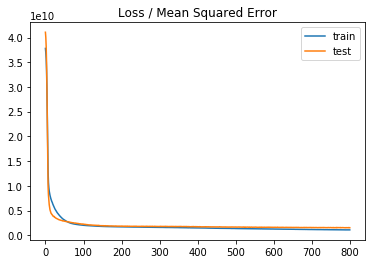

In [142]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [143]:
sale_price_keras = model.predict(test_new)
sub['SalePrice'] = sale_price_keras
sub.to_csv('submission.csv',index=False)
sub.head()

,Id,SalePrice
0,1461,141324.343750
1,1462,155842.218750
2,1463,205419.796875
3,1464,198624.328125
4,1465,168321.890625
